# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Мы рассматриваем таблицу, состоящую из 22 столбцов и 23699 строк. Изначально можно заметить пропуски данных во многих столбцах. Типы данных, которые используются: bool, float, int, и object.

### Шаг 2. Предобработка данных

In [7]:
data.isna().sum() #смотрим кол-во пропусков
 #заменяем пропущенные значения на медиану 
data.dropna(subset = ['locality_name'], inplace = True) #убираем все строки, где пропущен город
data['days_exposition'] = data['days_exposition'].fillna(data.groupby('locality_name')['days_exposition'].transform('median'))
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['floors_total'] = data['floors_total'].fillna(data.groupby('locality_name')['floors_total'].transform('median')) #меняем все площадные значения на медиану относительно города, а также количество дней, пока висело объявление о продаже
data['living_area'] = data['living_area'].fillna(data.groupby('locality_name')['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('locality_name')['kitchen_area'].transform('median'))
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.dropna(subset = ['living_area', 'kitchen_area', 'days_exposition'], inplace = True)
#Меняем типы данных
data['floors_total'] = data['floors_total'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data['parks_around3000'] = data['parks_around3000'].astype('uint8')
data['ponds_around3000'] = data['ponds_around3000'].astype('uint8')
data['days_exposition'] = data['days_exposition'].astype('uint16')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23552 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23552 non-null int64
last_price              23552 non-null float64
total_area              23552 non-null float64
first_day_exposition    23552 non-null object
rooms                   23552 non-null int64
ceiling_height          23459 non-null float64
floors_total            23552 non-null uint8
living_area             23552 non-null float64
floor                   23552 non-null int64
is_apartment            2751 non-null object
studio                  23552 non-null bool
open_plan               23552 non-null bool
kitchen_area            23552 non-null float64
balcony                 23552 non-null uint8
locality_name           23552 non-null object
airports_nearest        18114 non-null float64
cityCenters_nearest     18137 non-null float64
parks_around3000        23552 non-null uint8
parks_nearest           8064 non-null float64
ponds_around3000     

### Вывод 

Проделана следующая работа с данными: убраны все строки, в которых отсутствует название города, т.к. их невозможно объективно оценить, все пропущенные значения площади кухни, жилой зоны и т.п. заменены на медианное значение относительно городов, все что касается балконов или парков и прудов в районе 3000 метров, пропущенные значения для них заменены на 0, т.к. они и правда могут отсутствовать. Далее переходим к переменной is_apartment, мы не можем заменить на тип данных bool, т.к. все пропущенные значения, а их довольно много обретут значение True или False, это замена будет не совсем корректна. И переменные расстояния до ближайших аэропортов, парков и т.д. я тоже не затрагивал, т.к. ближайший объект, так или иначе, существует, но грамотно заменить мы не можем, это должно автоматически вноситься благодаря Google maps и т.п. А также заменены тип данных на целочисленный для балконов, этажей и сколько дней было размещено объявление, т.к. их не может быть, например 2.5 , и соответственно точно также для подсчета прудов и парков в радиусе 3000 метров.

### Шаг 3. Посчитайте и добавьте в таблицу

In [8]:
data['price_for_meter'] = data['last_price'] / data['total_area'] #находим стоимость 1 кв. м.

data['date_of_exposition'] =  pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d') #дата публикации объявления 
data['weekday_of_exposition'] = data['date_of_exposition'].dt.weekday
data['month_of_exposition'] = data['date_of_exposition'].dt.month
data['year_of_exposition'] = data['date_of_exposition'].dt.year


data['floor_of_flat'] = data['floors_total'] - data['floor']
data['floor2'] = data['floor']

def floor1(row):
    if 0 == row: #если мы вычтем из общего кол-ва этажей последний, то соответственно получится 0
        return 'последний'
    else:
        return 'другой'
def floor2(row):
    if 1 == row:
        return 'первый'
    else:
        return 'другой'
data['floor_of_flat'] = data['floor_of_flat'].apply(lambda x: floor1(x))
data['floor2'] = data['floor2'].apply(lambda x: floor2(x))

data['floor_of_flat'] = data['floor_of_flat'] + data['floor2']

def floor3(row):
    if 'последний' in row:
        return 'последний'
    elif 'первый' in row:
        return 'первый'
    else:
        return 'другой'
data['floor_of_flat'] = data['floor_of_flat'].apply(lambda x: floor3(x)) #создаем столбец с этажами вида: 'Первый', 'Последний' и 'Другой'
del data['floor2']
data['living_relation'] = data['living_area'] / data['total_area'] #площадь жилой зоны относительно общей
data['kitchen_relation'] = data['kitchen_area'] / data['total_area'] #площадь кухни относительно общей           

#data.head(30)

### Вывод

Я добавил следующие значения в таблицу: цена за 1 кв. м.; день недели, месяц и год публикации объявления; квалификация этажей, на котором находится квартира; площадь жилой зоны и кухни относительно общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

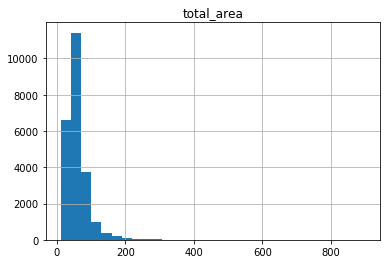

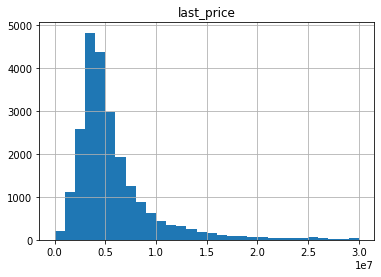

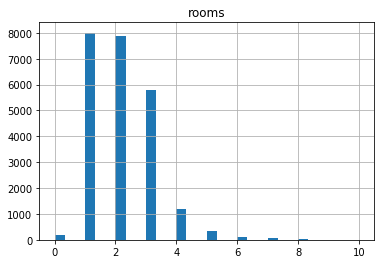

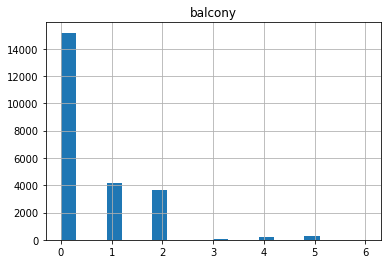

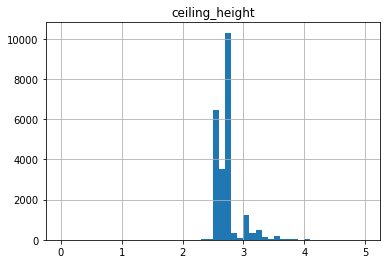

In [9]:
data.hist('total_area', bins = 30) #гистограмма общей площади квартир
data.hist('last_price', bins = 30, range = (0, 30000000)) #гистограмма для цены за квартиру
data.hist('rooms', bins = 30, range = (0, 10)) #гистограмма для кол-ва комнат в квартирах. Интересный факт: существует квартиры без комнат
data.hist('balcony', bins = 20, range = (0, 6)) #гистограмма балконов, большая часть квартир без балконов
data.hist('ceiling_height', bins = 50, range = (0, 5)) #гистограмма высоты потолков
plt.show()

95.0 170.20363451086956
435.0
45.0


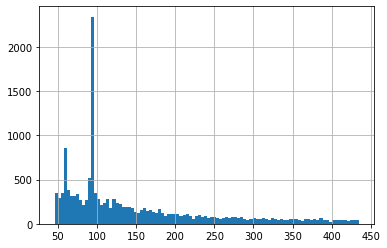

In [13]:
data['days_exposition'].hist(bins = 100, range = (46, 435)) #гистограмма для продаж квартир #2 меняем область определения
print(data['days_exposition'].median(), data['days_exposition'].mean())

q1 = data['days_exposition'].quantile(0.25)
q3 = data['days_exposition'].quantile(0.75)
iqr = q3 - q1
print(q3 + 1.5*iqr)
print(q1)

#мы получили медиану и среднее значения для времени продажи квартиры 95 и 170 дней соотвественно. Я считаю, что корректно взять медианное значение, т.к. можно заметить, что некоторые квартиры продавались 500 дней и 1000 дней, и даже больше, поэтому среднее значение становится в данном случае менее точным для оценки. Оценивая гистограмму, я решил, что к слишком долгим продажам можно отнести те, которые не продались за 435 дней и больше, а к слишком быстрым, которые продались в первые 45 дней после публикации объявления. Также на оценку повлияло то, что в начале мы заменили все NaN на медианное значение по известным данным. 

0.654037195042847


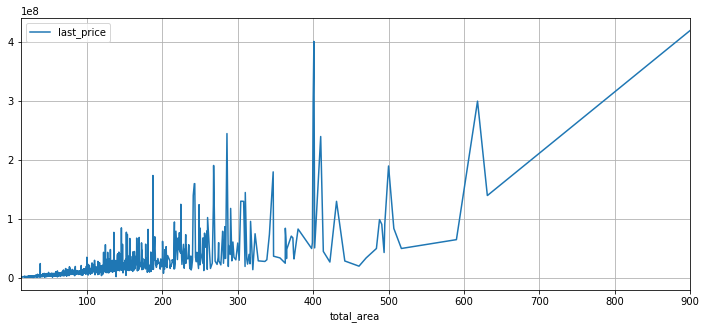

In [20]:
data.pivot_table(index = 'total_area', values = 'last_price').plot(grid = True, figsize = (12, 5)) #Находим, что сильнее всего влияет на стоимость квартиры
print(data['total_area'].corr(data['last_price'])) 

0.3638579712159247


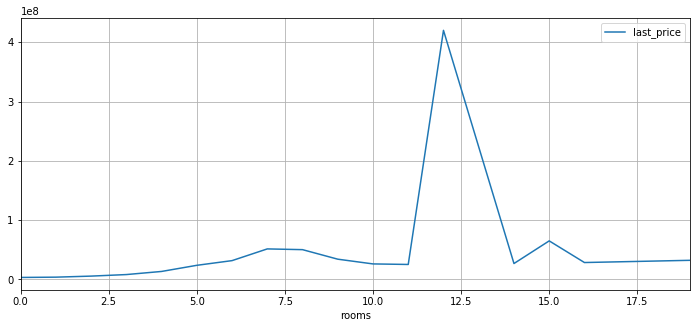

In [7]:
data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['rooms'].corr(data['last_price']))

-0.2068531041975434


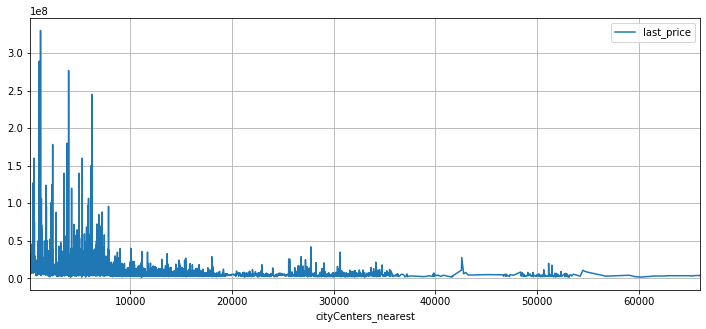

In [8]:
data.pivot_table(index = 'cityCenters_nearest', values = 'last_price').plot(grid = True, figsize = (12, 5)) #самые дорогие квартиры находятся близко к центру
print(data['cityCenters_nearest'].corr(data['last_price'])) 

Можно заметить, что квартиры ближе к центру, стоят гораздо больше

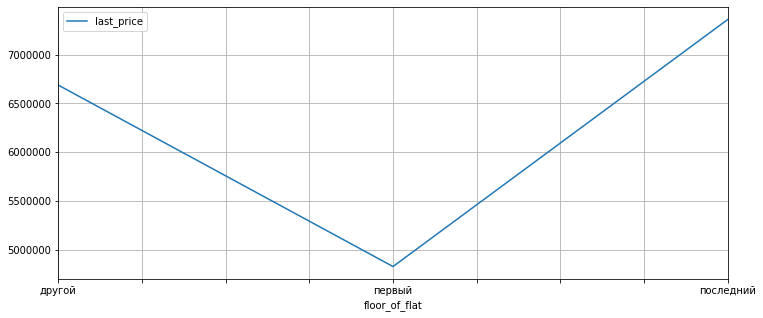

In [10]:
data.pivot_table(index = 'floor_of_flat', values = 'last_price').plot(grid = True, figsize = (12, 5)) 
#получаем, что самые дешевые квартиры на 1-ых этажах, а самые дорогие на последних.
plt.show()

Делаем следующий вывод: самые дешевые квартиры на 1 этаже, самые дорогие на последнем, а другие соотвественно между ними

0.0015708642450405204


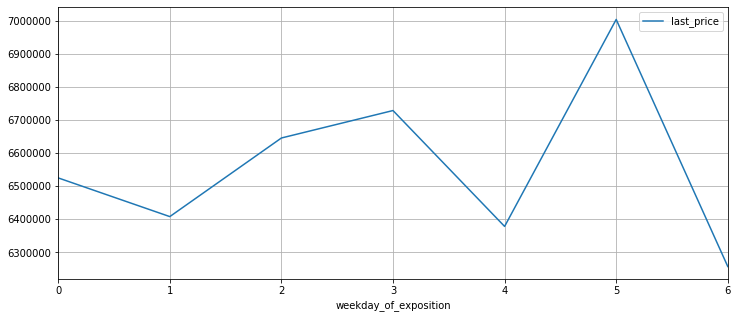

In [10]:
data.pivot_table(index = 'weekday_of_exposition', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['weekday_of_exposition'].corr(data['last_price'])) 

Советую покупать квартиры во вторник, либо в пятницу или в воскресенье.

0.0024543190526456283


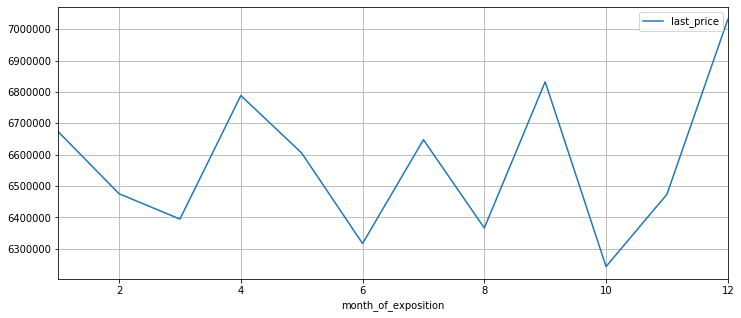

In [11]:
data.pivot_table(index = 'month_of_exposition', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['month_of_exposition'].corr(data['last_price'])) 

Зимой квартиры резко дорожают

-0.041604009599951114


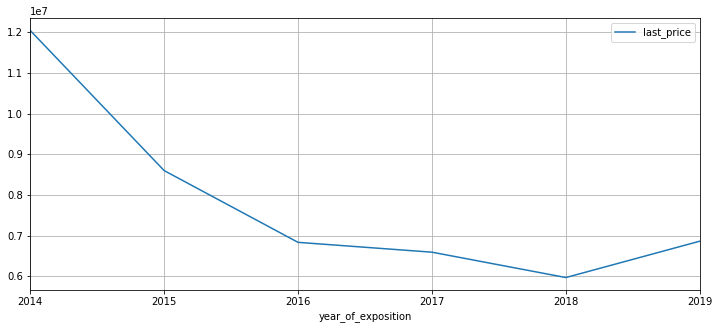

In [12]:
data.pivot_table(index = 'year_of_exposition', values = 'last_price').plot(grid = True, figsize = (12, 5))
print(data['year_of_exposition'].corr(data['last_price']))  

Подведем итог: стоимость квартиры больше всего зависит от её общей площади, затем идет кол-во комнат, также влияет расстояние от центра, а день недели, месяц и год, практические не влияют на стоимость. А также можно заметить, что после 2014 года стоимости квартир резко снизились до 2018 года, а к 2019 году опять пошел рост.

In [13]:
data.pivot_table(index='locality_name', values=['price_for_meter', 'last_price'], aggfunc={'last_price':'count', 'price_for_meter':'mean'})\
.rename(columns={'last_price':'top_of_exposition', 'price_for_meter':'mean_square'}).sort_values('top_of_exposition', ascending=False).head(10)\
.sort_values('mean_square', ascending=False) 
#Выделили 10 населенных пунктов в наибольшим числом объявлений, а также отсортировали их в порядке убывания по стоимости за кв.м.

,top_of_exposition,mean_square
locality_name,,
Санкт-Петербург,15721,114849.008794
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


<div class="alert alert-block alert-success">
<b>Success:</b> топ-10 выбран верно

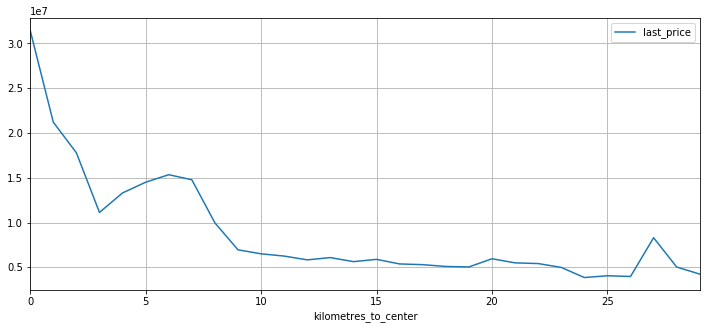

In [15]:
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['kilometres_to_center'] = data['cityCenters_nearest'] * 0.001 #cоздаем столбцец, который отражает сколько километров от квартиры до центра в Санкт-Петербурге
data['kilometres_to_center'] = data['kilometres_to_center'].round(0)#Округляем 
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='kilometres_to_center', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))
plt.show()
#по графику можно сделать вывод, что центральная зона имеет радиус 7 км.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd64a2a7850>]],
      dtype=object)

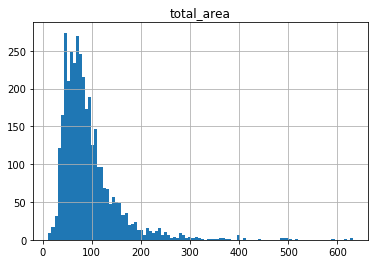

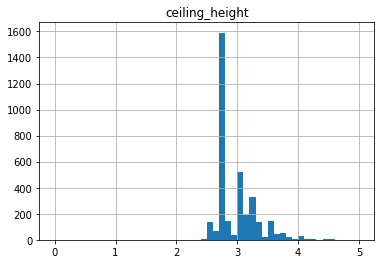

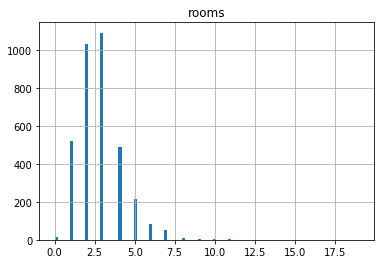

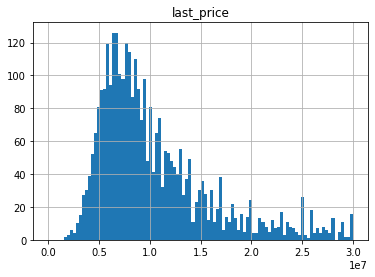

In [16]:
data_piter_center = data.query('locality_name == "Санкт-Петербург" and kilometres_to_center <= 7') #рассмотрим цену, площадь, высоту потолков и кол-во комнат для квартир в центре Питера
data_piter_center.hist('total_area', bins=100)
data_piter_center.hist('ceiling_height', bins=50, range = (0, 5))
data_piter_center.hist('rooms', bins=100)
data_piter_center.hist('last_price', bins=100, range = (0, 30000000))

-0.04054892363363872


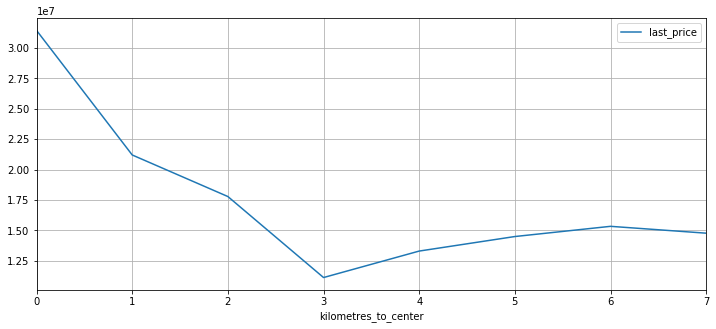

0.3148736324503906


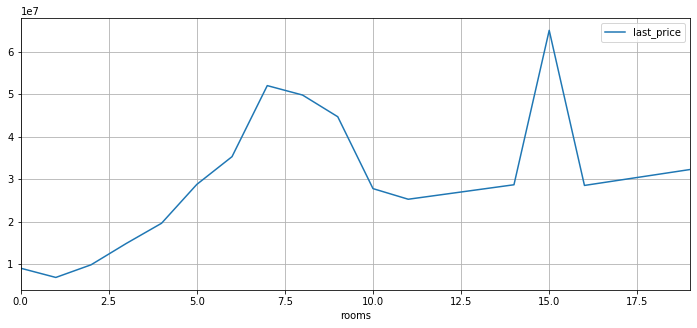

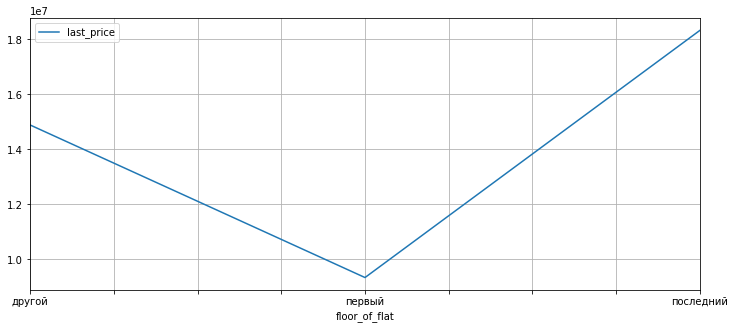

-0.04710086808906068


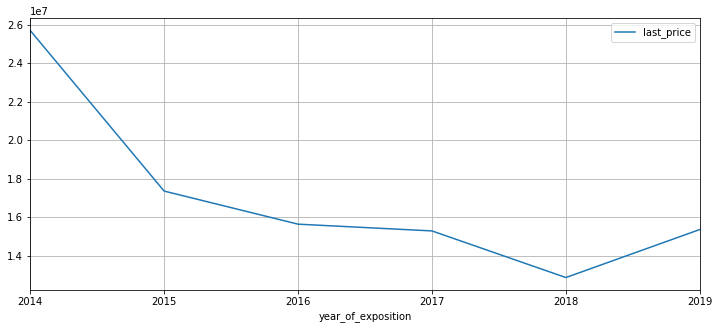

In [18]:
data_piter_center.pivot_table(index='kilometres_to_center', values='last_price').plot(grid=True, figsize=(12, 5)) 
print(data_piter_center['kilometres_to_center'].corr(data_piter_center['last_price']))
plt.show()
data_piter_center.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter_center['rooms'].corr(data_piter_center['last_price']))
plt.show()
data_piter_center.pivot_table(index='floor_of_flat', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()
data_piter_center.pivot_table(index='year_of_exposition', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter_center['year_of_exposition'].corr(data_piter_center['last_price']))
#Нашли зависимость цены от рассотояния до центра, кол-ва комнат, этажа квартиры и даты публикации в центре Питера

-0.2593987607930819


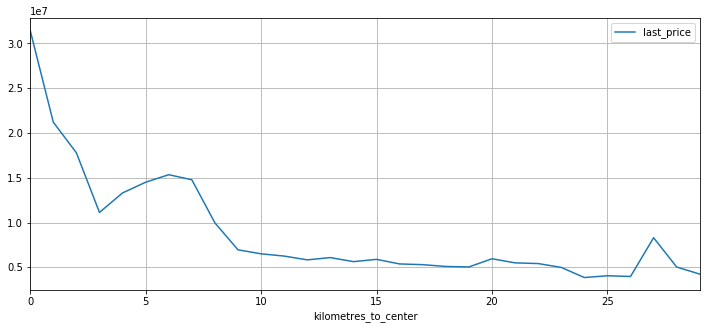

0.37237533826763347


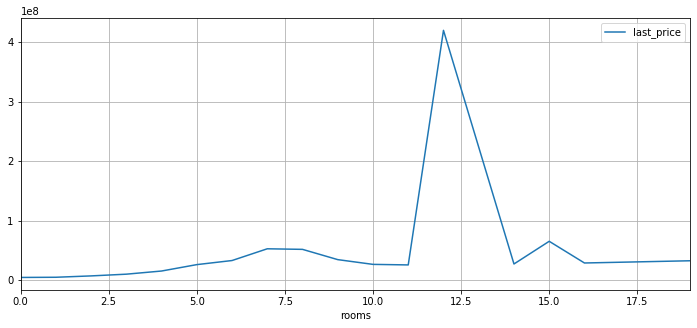

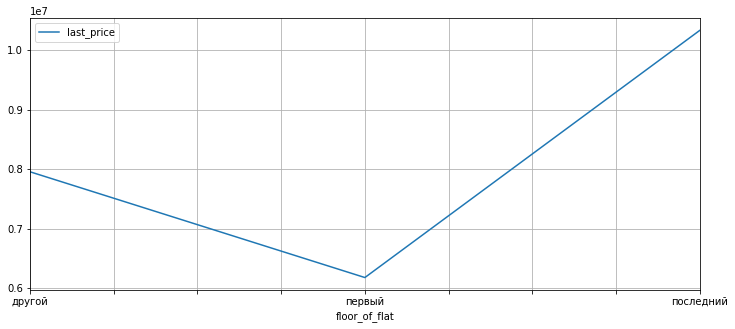

-0.04459056964885372


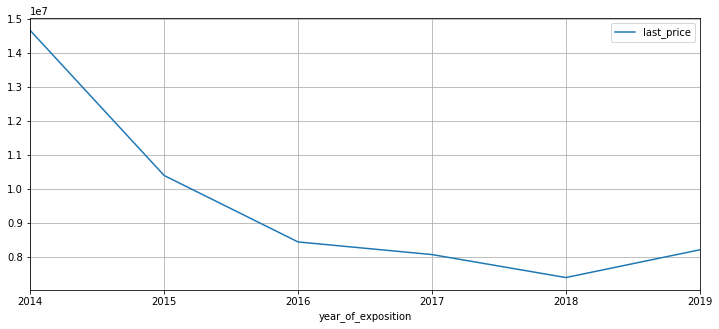

In [19]:
data_piter = data.query('locality_name == "Санкт-Петербург"')
data_piter.pivot_table(index='kilometres_to_center', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['kilometres_to_center'].corr(data_piter['last_price']))
plt.show()
data_piter.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['rooms'].corr(data_piter['last_price']))
plt.show()
data_piter.pivot_table(index='floor_of_flat', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()
data_piter.pivot_table(index='year_of_exposition', values='last_price').plot(grid=True, figsize=(12, 5))
print(data_piter['year_of_exposition'].corr(data_piter['last_price']))

Нашли зависимость цены от рассотояния до центра, кол-ва комнат, этажа квартиры и даты публикации в Питере.
Исходя из графиков и коэф. корр. можно сделать вывод, что т.к. квартиры в центральной области на их цену особо не влияет расстояние до самого центра, что не скажешь про весь Питер, тут естественно взаимосвязь будет позначительней.
Также относительно высокая корреляция прослеживается между кол-вом комнат и цены, что в центре, что во всем Питере.
От года публикации цена практически не зависит.

### Вывод

Заключение: проделана довольно громоздкая работа по анализу, отмечу основные аспекты. Построены гистограммы для площади, цены, числа комнат и потолков. Из графиков сделаны следующие выводы: выявлены основные тенденции, также замечены удивительные значения, например, в некоторых квартирах отсуствуют комнаты, это естественно ошибка, которую будет некорректно заменять каким-либо значением. Изучено время продажи квартир, для него построена оптимальная гистограмма, которая не включает в себя редкие и выбивающиеся значения, т.е. слишком быстрые покупки квартир или слишком долгие. Следующий пункт - зависимость стоимости квартиры от других показателей, таких как площадь, число комнат, удаленность от центра, этаж квартиры и дата размещения. Построены графики и вычислен коэф. корреляции. Также рассмотрены 10 населенных пунктов с наибольшим числом объявлений (Питер, Пушкин и т.д. их можно посмотреть в таблице) и они отсортированы в порядке убывания по средней цене за квадратный метр в данном населенном пункте. И в конце, произведен анализ по Санкт-Петербургу. В этом городе выделена центральная область, т.е. не более 7км от самого центра. Также проанализированы параметры в центре: цена, площадь, число комнат, а также высота потолков. Найдена зависимость цены квартиры в центре Питера от числа комнат, этажа, удаленность от центра и даты размещения объявления. Та же самая часть работы, проделана и для всего Питера и в итоге проведено сравнение между двумя сегментами.

### Шаг 5. Общий вывод

Данный проект основывался на данных сервиса Яндекс.Недвижимость.

Первоначально, взглянув на таблицу, невооружённым глазом можно заметить довольно большое кол-во пропущенны значений в нашем датасете. В итоге, убраны все строки, где отсутствовало название населенного пункта, т.к. основной критерий для анализа. А для многих значений таких, как высота потолков, жилой площади, кол-ва этажей и т.д. заменены на медианное значения по населенном пункту. А также заменен тип данных с вещественного на целочисленный там, где это уместно. Я решил не трогать пропущенные значения для расстояния от квартиры до какого-либо пункта, т.е. центра, аэропорта, парка и т.д., т.к. я считаю, что это техническая ошибка импортирования данных из других программ наподобие Google maps.

Следующим шагом добавляем в таблицу следующие столбцы: цена за кв. м.; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой и соотношение жилой и общей площади, а также отношение площади кухни к общей.

Непосредственно переходим к анализу. В начале построены гистограммы по всей таблице для общей площади кв., цены кв., число комнат и высоты потолков, по графикам сделаны основные выводы. Большинство квартир не имеют балконов. Чем больше площадь квартиры, тем больше цена, та же тенденция наблюдается с кол-вом комнат, но обнаружен резкий скачок стоимости, когда квартира состояла из 12 комнат. Если рассматривать изменение цены за последние 6 лет, то с 2014 года стоимость на квартиры снижалась и только с 2018 года направление изменилось, квартиры стали дорожать и стали стоить 2019, примерно как в 2016 и 2017 годах.  Были обнаружены аномалии, например, существуют квартиры без комнат, это довольно странно. Также изучена время продажи квартир, убраны из гистограммы редки и выбивающиеся значения, которые являются слишком быстрыми или слишком долгими покупками. Далее, идет пункт о том, что конкретно влияет на стоимость квартиры. Самый большой коэф. корреляции был между стоимостью и общей площади, отсюда делаем вывод, что основной фактор влияния на стоимость - это площадь квартиры. Если распределять по этажам, то на 1-ом этаже самые дешевые квартиры, а на последнем этаже самые дорогие. Далее рассмотрена таблица 10 населенных пунктов с наибольшим количеством объявлений, которые отсортированы в порядке убывания по цене за 1 кв. м. (Самый дорогой "метр" в Санкт-Петербурге, а самый дешевый в Выборге, если рассматривать только эти 10 населенных пунктов). Определена центральная область Питера, она составляется окружность радиусом 7 км, перед этим создан столбец, который показывает целое число км от квартиры до самого центра. После оценки цены, площади, числа комнат и высоты потолков в центральном районе Питера, выполнено сравнение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) для центральной области Спб и для всего города. Отсюда получаем, что внутри центральной области, расстояние до центра практических не влияет на стоимость, а если рассматривать весь город, то наблюдается приличная корреляция относительно центра. Тенденция этажей осталась неизменной. Число комнат практически одинаково влияет на стоимость квартиры, что в центре, что во всем Питере, но по всему Питеру, так или иначе, коэф. корреляция чуть больше. А год размещения объявления, практически не влияет на стоимость, что в центра, что во всем Питере. На этом анализ подошел к концу.